In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler,minmax_scale
from imblearn.over_sampling import SMOTE



import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('new_train.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [3]:
(1148/60)

19.133333333333333

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### job

In [5]:
df['job'].value_counts()

admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64

In [6]:
df_job=pd.get_dummies(df['job'])
df.drop('job',axis=1,inplace=True)
df_job.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0


In [7]:
### marital

In [8]:
df['marital'].value_counts()

married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64

In [9]:
df_marital=pd.get_dummies(df['marital'])
df.drop('marital',axis=1,inplace=True)
df_marital.head()

,divorced,married,single,unknown
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [10]:
# df.info()

### education

In [11]:
df['education'].value_counts()

university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: education, dtype: int64

In [12]:
df_education=pd.get_dummies(df['education'])
df.drop('education',axis=1,inplace=True)
df_education.head()

,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


### default

In [13]:
df['default'].value_counts().to_dict()

{'no': 26007, 'unknown': 6940, 'yes': 3}

In [14]:
df['default'].replace({'no': 1, 'unknown': 0, 'yes': 2},inplace=True)

In [15]:
### housing

In [16]:
df['housing'].value_counts().to_dict()

{'yes': 17254, 'no': 14900, 'unknown': 796}

In [17]:
df['housing'].replace({'no': 1, 'unknown': 0, 'yes': 2},inplace=True)

### loan

In [18]:
df['loan'].value_counts().to_dict()

{'no': 27131, 'yes': 5023, 'unknown': 796}

In [19]:
df['loan'].replace({'no': 1, 'unknown': 0, 'yes': 2},inplace=True)

### contact

In [20]:
df['contact'].value_counts().to_dict()

{'cellular': 20908, 'telephone': 12042}

In [21]:
df_contact=pd.get_dummies(df['contact'])
df.drop('contact',axis=1,inplace=True)
df_contact.head()

,cellular,telephone
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [22]:
# df.info()

### month

In [23]:
df['month'].value_counts()

may    11011
jul     5763
aug     4948
jun     4247
nov     3266
apr     2085
oct      587
sep      464
mar      436
dec      143
Name: month, dtype: int64

In [24]:
df.drop('month',axis=1,inplace=True)

### day_of_week

In [25]:
df['day_of_week'].value_counts()

thu    6857
mon    6812
wed    6515
tue    6444
fri    6322
Name: day_of_week, dtype: int64

In [26]:
df.drop('day_of_week',axis=1,inplace=True)

### poutcome

In [27]:
df['poutcome'].value_counts()

nonexistent    28416
failure         3429
success         1105
Name: poutcome, dtype: int64

In [28]:
df_poutcome=pd.get_dummies(df['poutcome'])
df.drop('poutcome',axis=1,inplace=True)
df_poutcome.head()

,failure,nonexistent,success
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


### target

In [29]:
df['y'].value_counts().to_dict()

{'no': 29238, 'yes': 3712}

In [30]:
df['y'].replace({'no': 0, 'yes': 1},inplace=True)

### duration

In [31]:
# need to work as it have values in seconds   ##### coonverted to hrs

In [32]:
df['duration']=df['duration']/360

In [33]:
df.columns

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')

#### converted all columns in object to the int or float

### -------------------------`concat all dummy in original df`--------------------------------------

In [34]:
df=pd.concat([df,df_job,df_marital,df_education,df_contact,df_poutcome],axis=1)
df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,y,admin.,...,high.school,illiterate,professional.course,university.degree,unknown,cellular,telephone,failure,nonexistent,success
0,49,0,1,1,0.630556,4,999,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,37,1,1,1,0.561111,2,999,1,0,0,...,0,0,0,1,0,0,1,1,0,0
2,78,1,1,1,3.188889,1,999,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,36,1,2,1,0.333333,2,999,0,0,1,...,0,0,0,1,0,0,1,0,1,0
4,59,1,1,1,1.022222,2,999,0,0,0,...,0,0,0,1,0,1,0,0,1,0


#                                   `EDA`

<AxesSubplot:xlabel='age'>

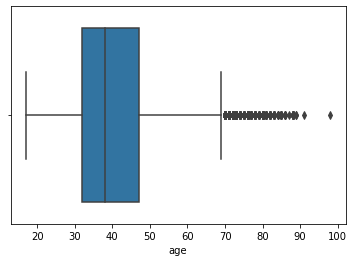

In [35]:
sns.boxplot(df['age'])   # maximum value is 98 it is possible value so no need to remove outliers

In [36]:
df.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,y,admin.,...,high.school,illiterate,professional.course,university.degree,unknown,cellular,telephone,failure,nonexistent,success
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,...,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,0.789469,1.499484,1.128285,0.717021,2.560607,962.052413,0.174719,0.112656,0.252322,...,0.230531,0.000486,0.127223,0.295478,0.042398,0.634537,0.365463,0.104067,0.862398,0.033536
std,10.403636,0.407915,0.546191,0.400186,0.719378,2.752326,187.951096,0.499025,0.316176,0.434351,...,0.421179,0.022031,0.333228,0.456264,0.201498,0.481567,0.481567,0.305352,0.344487,0.180033
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.286111,1.000000,999.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,1.000000,2.000000,1.000000,0.500000,2.000000,999.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,1.000000,2.000000,1.000000,0.886111,3.000000,999.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,98.000000,2.000000,2.000000,2.000000,13.661111,56.000000,999.000000,7.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='default', ylabel='count'>

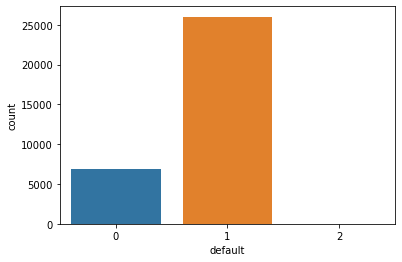

In [37]:
sns.countplot(df['default'])

<AxesSubplot:xlabel='housing', ylabel='count'>

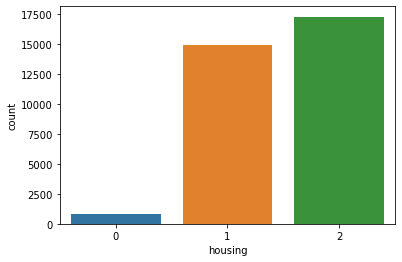

In [38]:
sns.countplot(df['housing'])

<AxesSubplot:xlabel='loan', ylabel='count'>

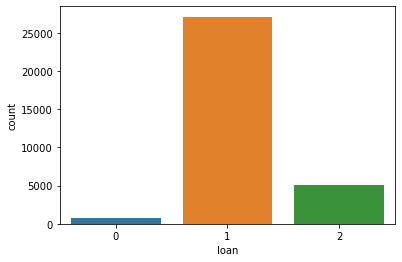

In [39]:
sns.countplot(df['loan'])

<AxesSubplot:xlabel='duration'>

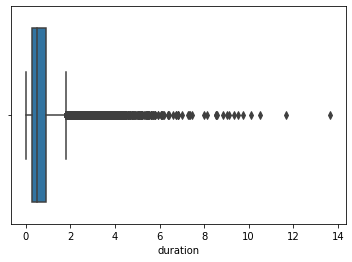

In [40]:
sns.boxplot(df['duration'])

In [41]:
iqr=df['duration'].quantile(0.75)-df['duration'].quantile(0.25)
upper_limit=df['duration'].quantile(0.75)+3*iqr
print("IQR",iqr)
print("upper limit",upper_limit)

IQR 0.6
upper limit 2.686111111111111


In [42]:
df['duration'].loc[df['duration']>upper_limit]

2        3.188889
32       3.238889
130      3.683333
153      4.130556
173      5.152778
           ...   
32746    2.902778
32767    3.211111
32784    4.627778
32785    3.169444
32877    3.983333
Name: duration, Length: 825, dtype: float64

In [43]:
mean_dur=df['duration'].loc[df['duration']<upper_limit].mean()
mean_dur

0.6409359683438945

In [44]:
df['duration'].loc[df['duration']<upper_limit].mode()[0]

0.25

In [45]:
df['duration'].loc[df['duration']<upper_limit].median()

0.4861111111111111

In [46]:
df['duration'].describe()

count    32950.000000
mean         0.717021
std          0.719378
min          0.000000
25%          0.286111
50%          0.500000
75%          0.886111
max         13.661111
Name: duration, dtype: float64

In [47]:
df['duration']=np.cbrt(df['duration'])

In [48]:
df.loc[(df['duration']>upper_limit),'duration']=upper_limit

In [49]:
# df.info()

### campaign

<AxesSubplot:xlabel='campaign'>

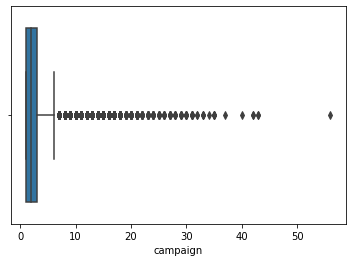

In [50]:
sns.boxplot(df['campaign'])

In [51]:
iqr=df['campaign'].quantile(0.75)-df['campaign'].quantile(0.25)
upper_limit=df['campaign'].quantile(0.75)+3*iqr
print("IQR",iqr)
print("upper limit",upper_limit)

IQR 2.0
upper limit 9.0


In [52]:
df['campaign'].loc[df['campaign']>upper_limit]

78       13
142      12
161      10
180      10
192      19
         ..
32727    14
32756    11
32824    12
32850    14
32852    11
Name: campaign, Length: 874, dtype: int64

In [53]:
df['campaign'].describe()

count    32950.000000
mean         2.560607
std          2.752326
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [54]:
df['campaign']=np.cbrt(df['campaign'])

In [55]:
df.loc[(df['campaign']>upper_limit),'campaign']=upper_limit

<AxesSubplot:xlabel='campaign'>

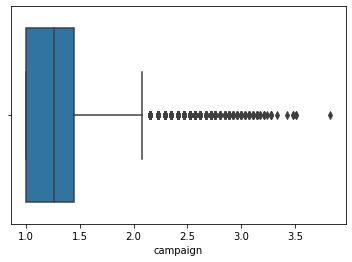

In [56]:
sns.boxplot(df['campaign'])

In [57]:
# df.info()

### pdays

<AxesSubplot:xlabel='pdays', ylabel='count'>

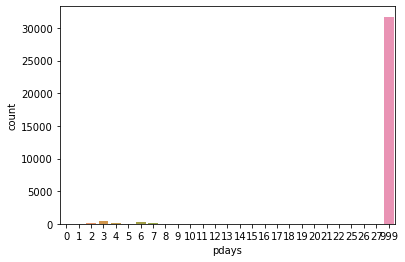

In [58]:
sns.countplot(df['pdays'])

In [59]:
df['pdays'].value_counts()

999    31724
3        355
6        337
4         97
2         52
7         47
9         45
10        43
12        40
5         40
13        28
1         22
11        21
15        21
14        18
8         14
0         12
16         9
17         8
18         6
22         3
19         2
21         2
27         1
25         1
20         1
26         1
Name: pdays, dtype: int64

In [60]:
# df['pdays'].replace({'999':0},inplace=True)

In [61]:
df.loc[df["pdays"] == 999, "pdays"] = 0

In [62]:
df['pdays'] =np.cbrt(df['pdays'])

<AxesSubplot:xlabel='pdays'>

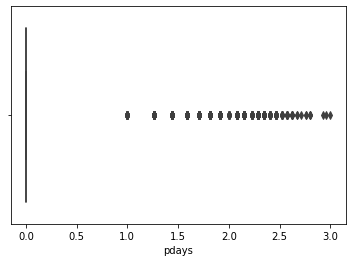

In [63]:
sns.boxplot(df['pdays'])

In [64]:
# df.info()

In [65]:
### previous

<AxesSubplot:xlabel='previous'>

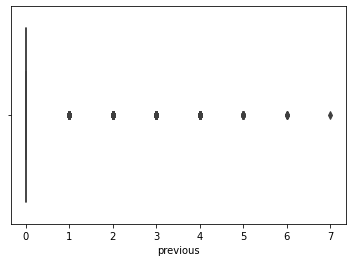

In [66]:
sns.boxplot(df['previous'])

In [67]:
df['previous']=np.cbrt(df['previous'])

In [68]:
df.corr()

,age,default,housing,loan,duration,campaign,pdays,previous,y,admin.,...,high.school,illiterate,professional.course,university.degree,unknown,cellular,telephone,failure,nonexistent,success
age,1.000000,-0.168900,-0.003382,-0.004685,0.004910,0.000831,0.028995,0.015760,0.028673,-0.101707,...,-0.108766,0.013476,0.005435,-0.067329,0.062664,-0.007760,0.007760,-0.004465,-0.013084,0.032609
default,-0.168900,1.000000,0.019196,0.006305,0.015682,-0.042119,0.079880,0.111412,0.098950,0.120311,...,0.053560,-0.005510,0.051029,0.143457,-0.052761,0.137318,-0.137318,0.077706,-0.109188,0.077132
housing,-0.003382,0.019196,1.000000,0.229756,-0.008232,-0.012243,0.011386,0.027676,0.008772,0.013981,...,-0.008982,0.002543,0.013534,0.018149,-0.000766,0.085593,-0.085593,0.022614,-0.028444,0.016071
loan,-0.004685,0.006305,0.229756,1.000000,-0.000846,0.009706,-0.000494,0.000286,-0.000526,0.021902,...,-0.002063,-0.000181,0.000280,0.014463,-0.003092,0.023121,-0.023121,0.001021,-0.001399,0.000946
duration,0.004910,0.015682,-0.008232,-0.000846,1.000000,-0.129604,0.072504,0.036289,0.389833,-0.013190,...,0.003850,0.002444,-0.012021,-0.013267,0.003846,0.043285,-0.043285,-0.003664,-0.031314,0.066133
campaign,0.000831,-0.042119,-0.012243,0.009706,-0.129604,1.000000,-0.057839,-0.095132,-0.069289,0.012540,...,-0.002793,-0.001601,0.006338,-0.002508,0.001056,-0.075142,0.075142,-0.073454,0.095419,-0.057997
pdays,0.028995,0.079880,0.011386,-0.000494,0.072504,-0.057839,1.000000,0.520886,0.317987,0.022665,...,-0.002238,-0.004224,0.009338,0.029282,0.028171,0.113844,-0.113844,0.010336,-0.479756,0.900465
previous,0.015760,0.111412,0.027676,0.000286,0.036289,-0.095132,0.520886,1.000000,0.211235,0.014950,...,0.020338,-0.004992,-0.006536,0.021418,0.016984,0.240640,-0.240640,0.824639,-0.990057,0.495782
y,0.028673,0.098950,0.008772,-0.000526,0.389833,-0.069289,0.317987,0.211235,1.000000,0.029477,...,-0.009283,0.005218,0.000215,0.052214,0.023638,0.143238,-0.143238,0.033858,-0.195115,0.315919
admin.,-0.101707,0.120311,0.013981,0.021902,-0.013190,0.012540,0.022665,0.014950,0.029477,1.000000,...,0.121832,-0.012804,-0.160985,0.329167,-0.054961,0.058831,-0.058831,0.002011,-0.013382,0.022194


In [69]:
df.corr(method = 'kendall')

,age,default,housing,loan,duration,campaign,pdays,previous,y,admin.,...,high.school,illiterate,professional.course,university.degree,unknown,cellular,telephone,failure,nonexistent,success
age,1.000000,-0.162397,-0.005264,-0.003833,-0.000609,0.003425,0.000026,-0.013252,-0.010764,-0.078454,...,-0.088906,0.012671,0.008471,-0.058743,0.049071,-0.027303,0.027303,-0.015683,0.013483,0.000800
default,-0.162397,1.000000,0.019310,0.006136,0.014541,-0.034987,0.080595,0.109147,0.098975,0.120348,...,0.053553,-0.005509,0.050958,0.143499,-0.052756,0.137294,-0.137294,0.077678,-0.109171,0.077147
housing,-0.005264,0.019310,1.000000,0.160931,-0.006211,-0.010325,0.012281,0.028742,0.009194,0.013247,...,-0.009418,0.002135,0.013489,0.017902,-0.000911,0.085574,-0.085574,0.023929,-0.029320,0.015517
loan,-0.003833,0.006136,0.160931,1.000000,-0.002924,0.010948,-0.000571,0.000936,-0.000522,0.021690,...,-0.002098,-0.000360,0.000063,0.014270,-0.003164,0.022083,-0.022083,0.001137,-0.001282,0.000525
duration,-0.000609,0.014541,-0.006211,-0.002924,1.000000,-0.062513,0.067924,0.036117,0.284111,-0.010154,...,0.003895,-0.000066,-0.011200,-0.013316,0.004223,0.029459,-0.029459,0.000630,-0.034424,0.064801
campaign,0.003425,-0.034987,-0.010325,0.010948,-0.062513,1.000000,-0.049647,-0.078193,-0.055249,0.009469,...,-0.001037,-0.000128,0.008703,-0.005734,0.000597,-0.058538,0.058538,-0.060215,0.078989,-0.049014
pdays,0.000026,0.080595,0.012281,-0.000571,0.067924,-0.049647,1.000000,0.498699,0.321714,0.022071,...,-0.003237,-0.004277,0.006765,0.033643,0.026086,0.115677,-0.115677,-0.001470,-0.485837,0.932125
previous,-0.013252,0.109147,0.028742,0.000936,0.036117,-0.078193,0.498699,1.000000,0.200229,0.013903,...,0.020917,-0.004848,-0.006446,0.019481,0.015056,0.240060,-0.240060,0.834368,-0.987314,0.474030
y,-0.010764,0.098975,0.009194,-0.000522,0.284111,-0.055249,0.321714,0.200229,1.000000,0.029477,...,-0.009283,0.005218,0.000215,0.052214,0.023638,0.143238,-0.143238,0.033858,-0.195115,0.315919
admin.,-0.078454,0.120348,0.013247,0.021690,-0.010154,0.009469,0.022071,0.013903,0.029477,1.000000,...,0.121832,-0.012804,-0.160985,0.329167,-0.054961,0.058831,-0.058831,0.002011,-0.013382,0.022194


In [70]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

<AxesSubplot:>

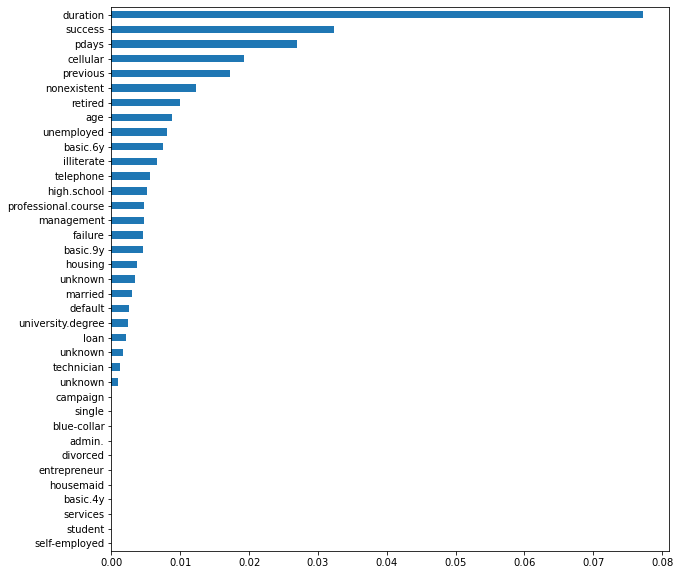

In [71]:
plt.figure(figsize=(10,10))
x = df.drop('y',axis = 1)
y = df['y']
array = mutual_info_regression(x,y)
s1 = pd.Series(array, index = x.columns)
s1.sort_values().plot(kind = 'barh')

In [72]:
df.drop(['unknown','campaign'],axis=1,inplace=True)

In [73]:
# fisher score

In [74]:
from skfeature.function.similarity_based import fisher_score

In [75]:
# array = fisher_score.fisher_score(x.values,y)

# s1 = pd.Series(array, index = x.columns)
# s1.sort_values().plot(kind = 'barh')
# # array
# warnings.filterwarnings('ignore')

In [76]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold=0.8)
var_thresh.fit(df)
array = var_thresh.get_support()
array

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [77]:
np.where(array == False)[0]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [78]:
df.drop(df.columns[np.where(array == False)[0]],axis = 1)

,age
0,49
1,37
2,78
3,36
4,59
...,...
32945,28
32946,52
32947,54
32948,29


In [79]:
# df

In [80]:
from sklearn.feature_selection import chi2,SelectKBest

In [81]:
chi_sqr, p_val = chi2(x,y)
df_chi2 = pd.DataFrame({'Feature':x.columns, 'Chi2 Value':chi_sqr, 'p_val':p_val})
df_chi2.loc[df_chi2['p_val'] <= 0.05]

,Feature,Chi2 Value,p_val
0,age,73.272510,1.129299e-17
1,default,67.995340,1.638824e-16
4,duration,368.912963,3.227577e-82
5,campaign,13.532803,2.344296e-04
6,pdays,5857.819777,0.000000e+00
7,previous,1374.852686,6.123917e-301
8,admin.,21.406155,3.715764e-06
9,blue-collar,140.492889,2.076977e-32
10,entrepreneur,8.117456,4.384103e-03
13,retired,275.938099,5.764710e-62


In [82]:
best_features = SelectKBest(chi2, k = 5)
best_features.fit(x,y)
df_chi2 = pd.DataFrame({'Feature':x.columns, 'Chi2 Value':best_features.scores_})
df_chi2.sort_values('Chi2 Value')

,Feature,Chi2 Value
3,loan,0.001296
29,professional.course,0.001335
12,management,0.099221
14,self-employed,0.210458
19,unknown,0.373684
2,housing,0.504455
28,illiterate,0.896591
17,technician,1.009159
11,housemaid,1.246205
23,unknown,2.081236


<AxesSubplot:>

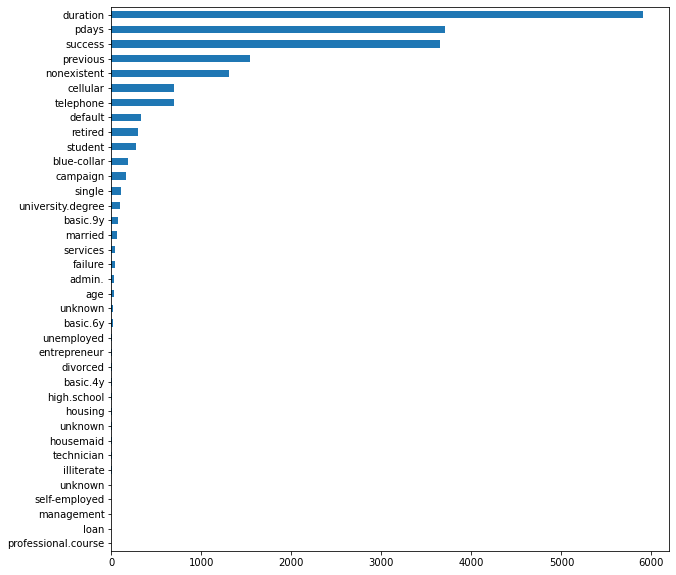

In [83]:
from sklearn.feature_selection import f_classif
plt.figure(figsize=(10,10))

f_val, p_val = f_classif(x,y)

df_anova = pd.DataFrame({'Feature':x.columns,"f_val":f_val, "p_val":p_val})
s1 = pd.Series(f_val,index =x.columns )
s1.sort_values().plot(kind= 'barh')

# smote

In [84]:
x=df.drop('y',axis=1)
y=df['y']

In [85]:
oversample = SMOTE(random_state=5)
X, Y = oversample.fit_resample(x, y)

In [86]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=23,stratify=Y)

# LOGISTIC REGRESSION

In [87]:
log_modl=LogisticRegression()
log_modl.fit(x_train,y_train)

LogisticRegression()

In [88]:
y_pred=log_modl.predict(x_test)
clf_report=classification_report(y_test,y_pred)
acc_score=accuracy_score(y_test,y_pred)
cnf_matrix=confusion_matrix(y_test,y_pred)
print("confusion matrix \n ",cnf_matrix)
print("accuracy score ",acc_score)
print("classification report \n",clf_report)

confusion matrix 
  [[7662 1109]
 [1074 7698]]
accuracy score  0.8755629025822266
classification report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      8771
           1       0.87      0.88      0.88      8772

    accuracy                           0.88     17543
   macro avg       0.88      0.88      0.88     17543
weighted avg       0.88      0.88      0.88     17543



In [89]:
y_pred_train=log_modl.predict(x_train)
clf_report=classification_report(y_train,y_pred_train)
acc_score=accuracy_score(y_train,y_pred_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("confusion matrix \n ",cnf_matrix)
print("accuracy score ",acc_score)
print("classification report \n",clf_report)

confusion matrix 
  [[17900  2567]
 [ 2684 17782]]
accuracy score  0.8717171963941075
classification report 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     20467
           1       0.87      0.87      0.87     20466

    accuracy                           0.87     40933
   macro avg       0.87      0.87      0.87     40933
weighted avg       0.87      0.87      0.87     40933



# KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
knn_modl=KNeighborsClassifier()
knn_modl.fit(x_train,y_train)

KNeighborsClassifier()

In [92]:
y_pred=knn_modl.predict(x_test)
clf_report=classification_report(y_test,y_pred)
acc_score=accuracy_score(y_test,y_pred)
cnf_matrix=confusion_matrix(y_test,y_pred)
print("confusion matrix \n ",cnf_matrix)
print("accuracy score ",acc_score)
print("classification report \n",clf_report)

confusion matrix 
  [[7028 1743]
 [ 550 8222]]
accuracy score  0.8692925953371715
classification report 
               precision    recall  f1-score   support

           0       0.93      0.80      0.86      8771
           1       0.83      0.94      0.88      8772

    accuracy                           0.87     17543
   macro avg       0.88      0.87      0.87     17543
weighted avg       0.88      0.87      0.87     17543



In [93]:
y_pred_train=knn_modl.predict(x_train)
clf_report=classification_report(y_train,y_pred_train)
acc_score=accuracy_score(y_train,y_pred_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("confusion matrix \n ",cnf_matrix)
print("accuracy score ",acc_score)
print("classification report \n",clf_report)

confusion matrix 
  [[17587  2880]
 [  747 19719]]
accuracy score  0.9113917865780666
classification report 
               precision    recall  f1-score   support

           0       0.96      0.86      0.91     20467
           1       0.87      0.96      0.92     20466

    accuracy                           0.91     40933
   macro avg       0.92      0.91      0.91     40933
weighted avg       0.92      0.91      0.91     40933



# decision tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dt_modl=DecisionTreeClassifier()
dt_modl.fit(x_train,y_train)

DecisionTreeClassifier()

In [96]:
y_pred=dt_modl.predict(x_test)
clf_report=classification_report(y_test,y_pred)
acc_score=accuracy_score(y_test,y_pred)
cnf_matrix=confusion_matrix(y_test,y_pred)
print("confusion matrix \n ",cnf_matrix)
print("accuracy score ",acc_score)
print("classification report \n",clf_report)

confusion matrix 
  [[7344 1427]
 [1205 7567]]
accuracy score  0.8499686484637747
classification report 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      8771
           1       0.84      0.86      0.85      8772

    accuracy                           0.85     17543
   macro avg       0.85      0.85      0.85     17543
weighted avg       0.85      0.85      0.85     17543



In [97]:
y_pred_train=dt_modl.predict(x_train)
clf_report=classification_report(y_train,y_pred_train)
acc_score=accuracy_score(y_train,y_pred_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("confusion matrix \n ",cnf_matrix)
print("accuracy score ",acc_score)
print("classification report \n",clf_report)

confusion matrix 
  [[20467     0]
 [    4 20462]]
accuracy score  0.9999022793345222
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20467
           1       1.00      1.00      1.00     20466

    accuracy                           1.00     40933
   macro avg       1.00      1.00      1.00     40933
weighted avg       1.00      1.00      1.00     40933



# hyper-parameter tunning

In [98]:
# hyp={'criterion':['gini','entropy'],
#     'max_depth':np.arange(2,20),
#     'min_samples_split':np.arange(2,20),
#     'min_samples_leaf':np.arange(2,15)}
# gscv_modl=GridSearchCV(dt_modl,hyp,cv=5)
# gscv_modl.fit(x_train, y_train)

In [99]:
 hyp={'criterion':['gini','entropy'],
    'max_depth':np.arange(2,20),
    'min_samples_split':np.arange(2,20),
    'min_samples_leaf':np.arange(2,15)}
gscv_modl=RandomizedSearchCV(dt_modl,hyp,cv=5)
gscv_modl.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [100]:
gscv_modl.best_estimator_

DecisionTreeClassifier(max_depth=16, min_samples_leaf=12, min_samples_split=3)

In [101]:
dt_modl_rscv=gscv_modl.best_estimator_
dt_modl_rscv.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=16, min_samples_leaf=12, min_samples_split=3)

In [102]:
y_pred=dt_modl_rscv.predict(x_test)
clf_report=classification_report(y_test,y_pred)
acc_score=accuracy_score(y_test,y_pred)
cnf_matrix=confusion_matrix(y_test,y_pred)
print("confusion matrix \n ",cnf_matrix)
print("accuracy score ",acc_score)
print("classification report \n",clf_report)

confusion matrix 
  [[7178 1593]
 [1043 7729]]
accuracy score  0.8497406372912273
classification report 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      8771
           1       0.83      0.88      0.85      8772

    accuracy                           0.85     17543
   macro avg       0.85      0.85      0.85     17543
weighted avg       0.85      0.85      0.85     17543



In [103]:
y_pred_train=dt_modl_rscv.predict(x_train)
clf_report=classification_report(y_train,y_pred_train)
acc_score=accuracy_score(y_train,y_pred_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("confusion matrix \n ",cnf_matrix)
print("accuracy score ",acc_score)
print("classification report \n",clf_report)

confusion matrix 
  [[17302  3165]
 [ 2018 18448]]
accuracy score  0.8733784477072288
classification report 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87     20467
           1       0.85      0.90      0.88     20466

    accuracy                           0.87     40933
   macro avg       0.87      0.87      0.87     40933
weighted avg       0.87      0.87      0.87     40933



# random forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf_modl=RandomForestClassifier()
rf_modl.fit(x_train,y_train)

RandomForestClassifier()

In [106]:
y_pred=rf_modl.predict(x_test)
clf_report=classification_report(y_test,y_pred)
acc_score=accuracy_score(y_test,y_pred)
cnf_matrix=confusion_matrix(y_test,y_pred)
print("confusion matrix \n ",cnf_matrix)
print("accuracy score ",acc_score)
print("classification report \n",clf_report)

confusion matrix 
  [[7761 1010]
 [ 645 8127]]
accuracy score  0.9056603773584906
classification report 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      8771
           1       0.89      0.93      0.91      8772

    accuracy                           0.91     17543
   macro avg       0.91      0.91      0.91     17543
weighted avg       0.91      0.91      0.91     17543



In [107]:
y_pred_train=rf_modl.predict(x_train)
clf_report=classification_report(y_train,y_pred_train)
acc_score=accuracy_score(y_train,y_pred_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("confusion matrix \n ",cnf_matrix)
print("accuracy score ",acc_score)
print("classification report \n",clf_report)

confusion matrix 
  [[20465     2]
 [    2 20464]]
accuracy score  0.9999022793345222
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20467
           1       1.00      1.00      1.00     20466

    accuracy                           1.00     40933
   macro avg       1.00      1.00      1.00     40933
weighted avg       1.00      1.00      1.00     40933



In [108]:
hyp={'n_estimators':np.arange(50,200),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(2,20),
    'min_samples_split':np.arange(2,20),
    'min_samples_leaf':np.arange(2,15),
    'max_features':['auto','sqrt']}
rscv_rf=RandomizedSearchCV(rf_modl,hyp,cv=5)
rscv_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_esti...
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160,

In [109]:
rscv_rf.best_estimator_

RandomForestClassifier(max_depth=18, max_features='sqrt', min_samples_leaf=7,
                       min_samples_split=5, n_estimators=93)

In [110]:
rf_modl_hyp=rscv_rf.best_estimator_
rf_modl_hyp.fit(x_train,y_train)

RandomForestClassifier(max_depth=18, max_features='sqrt', min_samples_leaf=7,
                       min_samples_split=5, n_estimators=93)

In [111]:
y_pred=rf_modl_hyp.predict(x_test)
clf_report=classification_report(y_test,y_pred)
acc_score=accuracy_score(y_test,y_pred)
cnf_matrix=confusion_matrix(y_test,y_pred)
print("confusion matrix \n ",cnf_matrix)
print("accuracy score ",acc_score)
print("classification report \n",clf_report)

confusion matrix 
  [[7341 1430]
 [ 801 7971]]
accuracy score  0.8728267685116571
classification report 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      8771
           1       0.85      0.91      0.88      8772

    accuracy                           0.87     17543
   macro avg       0.87      0.87      0.87     17543
weighted avg       0.87      0.87      0.87     17543



In [112]:
y_pred_train=rf_modl_hyp.predict(x_train)
clf_report=classification_report(y_train,y_pred_train)
acc_score=accuracy_score(y_train,y_pred_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("confusion matrix \n ",cnf_matrix)
print("accuracy score ",acc_score)
print("classification report \n",clf_report)

confusion matrix 
  [[17446  3021]
 [ 1722 18744]]
accuracy score  0.8841277209097794
classification report 
               precision    recall  f1-score   support

           0       0.91      0.85      0.88     20467
           1       0.86      0.92      0.89     20466

    accuracy                           0.88     40933
   macro avg       0.89      0.88      0.88     40933
weighted avg       0.89      0.88      0.88     40933



# adaboost

In [113]:
from sklearn.ensemble import AdaBoostClassifier

In [114]:
ada_modl=AdaBoostClassifier()
ada_modl.fit(x_train,y_train)

AdaBoostClassifier()

In [115]:
y_pred=ada_modl.predict(x_test)
clf_report=classification_report(y_test,y_pred)
acc_score=accuracy_score(y_test,y_pred)
cnf_matrix=confusion_matrix(y_test,y_pred)
print("confusion matrix \n ",cnf_matrix)
print("accuracy score ",acc_score)
print("classification report \n",clf_report)

confusion matrix 
  [[7459 1312]
 [1127 7645]]
accuracy score  0.8609701875391894
classification report 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      8771
           1       0.85      0.87      0.86      8772

    accuracy                           0.86     17543
   macro avg       0.86      0.86      0.86     17543
weighted avg       0.86      0.86      0.86     17543



In [116]:
y_pred_train=ada_modl.predict(x_train)
clf_report=classification_report(y_train,y_pred_train)
acc_score=accuracy_score(y_train,y_pred_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("confusion matrix \n ",cnf_matrix)
print("accuracy score ",acc_score)
print("classification report \n",clf_report)

confusion matrix 
  [[17446  3021]
 [ 2706 17760]]
accuracy score  0.8600884372022574
classification report 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86     20467
           1       0.85      0.87      0.86     20466

    accuracy                           0.86     40933
   macro avg       0.86      0.86      0.86     40933
weighted avg       0.86      0.86      0.86     40933



In [117]:
hyp={'n_estimators':np.arange(50,200)}
rf_ada_hyp=RandomizedSearchCV(ada_modl,hyp,cv=5)
rf_ada_hyp.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'n_estimators': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199])})

In [118]:
rf_ada_hyp.best_estimator_

AdaBoostClassifier(n_estimators=194)

In [119]:
ada_modl_hyp=rf_ada_hyp.best_estimator_
ada_modl_hyp.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=194)

In [120]:
y_pred=ada_modl_hyp.predict(x_test)
clf_report=classification_report(y_test,y_pred)
acc_score=accuracy_score(y_test,y_pred)
cnf_matrix=confusion_matrix(y_test,y_pred)
print("confusion matrix \n ",cnf_matrix)
print("accuracy score ",acc_score)
print("classification report \n",clf_report)

confusion matrix 
  [[7642 1129]
 [1015 7757]]
accuracy score  0.8777860115145643
classification report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      8771
           1       0.87      0.88      0.88      8772

    accuracy                           0.88     17543
   macro avg       0.88      0.88      0.88     17543
weighted avg       0.88      0.88      0.88     17543



In [121]:
y_pred_train=ada_modl_hyp.predict(x_train)
clf_report=classification_report(y_train,y_pred_train)
acc_score=accuracy_score(y_train,y_pred_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("confusion matrix \n ",cnf_matrix)
print("accuracy score ",acc_score)
print("classification report \n",clf_report)

confusion matrix 
  [[17857  2610]
 [ 2471 17995]]
accuracy score  0.8758703246769111
classification report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88     20467
           1       0.87      0.88      0.88     20466

    accuracy                           0.88     40933
   macro avg       0.88      0.88      0.88     40933
weighted avg       0.88      0.88      0.88     40933



# naive bayes

In [122]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [123]:
# GaussianNB

In [124]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

GaussianNB()

In [125]:
# Training Data Evaluation
y_pred_train = gnb_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

acc_score = accuracy_score(y_train, y_pred_train)
print("accuracy score :",acc_score)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[15890  4577]
 [ 6014 14452]]
accuracy score : 0.7412601079813353
Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.78      0.75     20467
           1       0.76      0.71      0.73     20466

    accuracy                           0.74     40933
   macro avg       0.74      0.74      0.74     40933
weighted avg       0.74      0.74      0.74     40933



In [126]:
# Testing Data Evaluation

y_pred = gnb_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

acc_score = accuracy_score(y_test, y_pred)
print("accuracy score :",acc_score)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[6799 1972]
 [2519 6253]]
accuracy score : 0.7440004560223451
Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.78      0.75      8771
           1       0.76      0.71      0.74      8772

    accuracy                           0.74     17543
   macro avg       0.74      0.74      0.74     17543
weighted avg       0.74      0.74      0.74     17543



In [127]:
# MultinomialNB

In [128]:
mnb_model = MultinomialNB()
mnb_model.fit(x_train, y_train)

# Training Data Evaluation
y_pred_train = mnb_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

acc_score = accuracy_score(y_train, y_pred_train)
print("accuracy score :",acc_score)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[16652  3815]
 [ 8907 11559]]
accuracy score : 0.6891994234480737
Classification Report :
               precision    recall  f1-score   support

           0       0.65      0.81      0.72     20467
           1       0.75      0.56      0.65     20466

    accuracy                           0.69     40933
   macro avg       0.70      0.69      0.68     40933
weighted avg       0.70      0.69      0.68     40933



In [129]:
# Testing Data Evaluation

y_pred = mnb_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

acc_score = accuracy_score(y_test, y_pred)
print("accuracy score :",acc_score)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[7096 1675]
 [3801 4971]]
accuracy score : 0.6878527047825344
Classification Report :
               precision    recall  f1-score   support

           0       0.65      0.81      0.72      8771
           1       0.75      0.57      0.64      8772

    accuracy                           0.69     17543
   macro avg       0.70      0.69      0.68     17543
weighted avg       0.70      0.69      0.68     17543



In [130]:
# BernoulliNB

In [131]:
bnb_model = BernoulliNB()
bnb_model.fit(x_train, y_train)

# Training Data Evaluation
y_pred_train = bnb_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

acc_score = accuracy_score(y_train, y_pred_train)
print("accuracy score :",acc_score)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[14913  5554]
 [ 7895 12571]]
accuracy score : 0.6714386924974959
Classification Report :
               precision    recall  f1-score   support

           0       0.65      0.73      0.69     20467
           1       0.69      0.61      0.65     20466

    accuracy                           0.67     40933
   macro avg       0.67      0.67      0.67     40933
weighted avg       0.67      0.67      0.67     40933



In [132]:
# Testing Data Evaluation

y_pred = bnb_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

acc_score = accuracy_score(y_test, y_pred)
print("accuracy score :",acc_score)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[6360 2411]
 [3360 5412]]
accuracy score : 0.6710368808071595
Classification Report :
               precision    recall  f1-score   support

           0       0.65      0.73      0.69      8771
           1       0.69      0.62      0.65      8772

    accuracy                           0.67     17543
   macro avg       0.67      0.67      0.67     17543
weighted avg       0.67      0.67      0.67     17543



In [133]:
# Logistic regression :
#     training accuracy score  0.8663181296264627
#     testing accuracy score   0.8681525394744343
# KNN:
#     training accuracy score  0.9080937141181932
#     testing accuracy score   0.8699766288548139
# decision tree with hyper parameter:
#     training accuracy score  0.871521755063152
#     testing accuracy score   0.8465484808755629

# Random forest:
#     training accuracy score  0.999657977670828
#     testing accuracy score   0.8970529555948241
    
# random forest with hyper parameter:                             best value
#     training accuracy score  0.8749175481885032
#     testing accuracy score   0.867411503163655

# AdaBoost:
#     training accuracy score  0.8571079569051865
#     testing accuracy score   0.8564099640882403
    
# AdaBoost with hyper parameter:                                    best value
#     training accuracy score  0.8709842914030245
#     testing accuracy score   0.8724847517528359
    
# naive bayes:
    
#     BernoulliNB:
#         training accuracy score : 0.6657220335670486
#         testing accuracy score :  0.6651655931140625
            
#     MultinomialNB:
#         training accuracy score : 0.6787921725746953
#         testing accuracy score :  0.6795872997776891
            
#     GaussianNB:
#         training accuracy score : 0.7344440915642636
#         testing accuracy score :  0.7376161431910163
                  

In [134]:
# AdaBoost with hyper parameter

In [135]:
# import pickle
# with open('ada_modl_hyp.pkl', 'wb') as files:
#     pickle.dump(ada_modl_hyp, files)

In [136]:
# import pickle
# columns_dict = {"columns" : x_train.columns}
# dict_cols = open("columns.pkl",'wb')
# pickle.dump(columns_dict,dict_cols)
# dict_cols.close()

In [137]:
x_train.columns

Index(['age', 'default', 'housing', 'loan', 'duration', 'pdays', 'previous',
       'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'divorced', 'married', 'single', 'basic.4y', 'basic.6y',
       'basic.9y', 'high.school', 'illiterate', 'professional.course',
       'university.degree', 'cellular', 'telephone', 'failure', 'nonexistent',
       'success'],
      dtype='object')

In [138]:
x_train.iloc[:,7:18].head(2)

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
8779,0,0,0,0,0,0,0,0,0,1,0
4201,1,0,0,0,0,0,0,0,0,0,0


In [139]:
df_job.head(2)

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0


In [140]:
df_marital.head(2)

,divorced,married,single,unknown
0,0,1,0,0
1,0,1,0,0


In [141]:
x_train.iloc[:,18:21].head(2)

,divorced,married,single
8779,0,1,0
4201,1,0,0


In [142]:
x_train.iloc[:,21:28].head(2)

,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
8779,0,0,0,0,0,0,1
4201,0,0,0,0,0,0,1


In [143]:
df_education.head(2)

,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0


In [144]:
df_contact.head(2)

,cellular,telephone
0,1,0
1,0,1


In [145]:
x_train.iloc[:,28:30].head(2)

,cellular,telephone
8779,1,0
4201,1,0


In [146]:
df_poutcome.head(2)

,failure,nonexistent,success
0,0,1,0
1,1,0,0


In [147]:
x_train.iloc[:,30:].head(2)

,failure,nonexistent,success
8779,0,1,0
4201,0,1,0
